In [ ]:

import pandas as pd
import numpy as np
import keras.utils as ku
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

In [ ]:
df = pd.read_csv('Wine.csv')

df.isnull().sum()
df.columns = [  'name'
                 ,'alcohol'
             	,'malicAcid'
             	,'ash'
            	,'ashalcalinity'
             	,'magnesium'
            	,'totalPhenols'
             	,'flavanoids'
             	,'nonFlavanoidPhenols'
             	,'proanthocyanins'
            	,'colorIntensity'
             	,'hue'
             	,'od280_od315'
             	,'proline'
                ]

In [ ]:
#df['name'] = df['name'].map({'1': 0, '2': 1, '3': 2})
df

,name,alcohol,malicAcid,ash,ashalcalinity,magnesium,totalPhenols,flavanoids,nonFlavanoidPhenols,proanthocyanins,colorIntensity,hue,od280_od315,proline
0,0,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,0,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,0,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,0,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,0,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,2,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,2,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,2,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,2,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


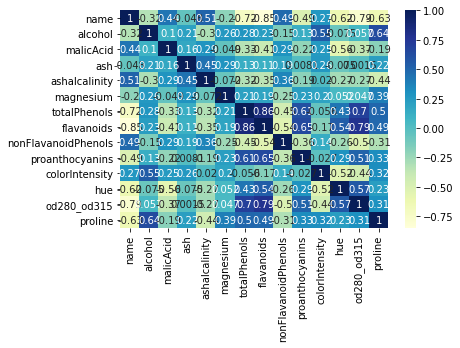

In [ ]:
import seaborn as sns
correlations = df[df.columns].corr(method='pearson')
sns.heatmap(correlations, cmap="YlGnBu", annot = True)

In [ ]:
import heapq

print('Absolute overall correlations')
print('-' * 30)
correlations_abs_sum = correlations[correlations.columns].abs().sum()
print(correlations_abs_sum, '\n')

print('Weakest correlations')
print('-' * 30)
print(correlations_abs_sum.nsmallest(3))

Absolute overall correlations
------------------------------
name                   7.368958
alcohol                4.309682
malicAcid              4.655692
ash                    3.153986
ashalcalinity          4.834784
magnesium              3.425328
totalPhenols           6.597619
flavanoids             7.179845
nonFlavanoidPhenols    5.289542
proanthocyanins        5.050497
colorIntensity         4.217064
hue                    5.511051
od280_od315            6.337598
proline                5.987365
dtype: float64 

Weakest correlations
------------------------------
ash               3.153986
magnesium         3.425328
colorIntensity    4.217064
dtype: float64


In [ ]:
print(df.columns)

Index(['name', 'alcohol', 'malicAcid', 'ash', 'ashalcalinity', 'magnesium',
       'totalPhenols', 'flavanoids', 'nonFlavanoidPhenols', 'proanthocyanins',
       'colorIntensity', 'hue', 'od280_od315', 'proline'],
      dtype='object')


In [ ]:
df = df.drop(columns=['ash','magnesium', 'colorIntensity'], axis =1)

In [ ]:
#Selecting dependent and independent variables
y = df.iloc[: ,0 ].values
X = df.iloc[:, 1:15].values
X[1]

array([1.316e+01, 2.360e+00, 1.860e+01, 2.800e+00, 3.240e+00, 3.000e-01,
       2.810e+00, 1.030e+00, 3.170e+00, 1.185e+03])

In [ ]:
df_hotencoded = pd.get_dummies(y)
df_hotencoded.head()

,0,1,2
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, df_hotencoded, test_size = 0.20)
y_test

,0,1,2
56,1,0,0
34,1,0,0
101,0,1,0
97,0,1,0
139,0,0,1
7,1,0,0
85,0,1,0
53,1,0,0
130,0,0,1
133,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train[1]
len(y_train)

141

In [ ]:
import tensorflow as tf



In [ ]:
ann = tf.keras.models.Sequential()


In [ ]:
ann.add(tf.keras.layers.Dense(units = 32, input_dim = 10, activation='relu'))
ann.add(tf.keras.layers.Dense(units = 64, activation='relu'))

ann.add(tf.keras.layers.Dense(units = 128, activation='relu'))
ann.add(tf.keras.layers.Dense(units = 3, activation='softmax'))



In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
ann.compile(optimizer= opt,  loss = 'categorical_crossentropy', metrics= ['accuracy'])

In [ ]:
ann.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=32 , epochs=100, )

Epoch 1/100
5/5 [==============================] - 0s 27ms/step - loss: 0.7200 - accuracy: 0.7447 - val_loss: 0.2333 - val_accuracy: 0.9167
Epoch 2/100
5/5 [==============================] - 0s 9ms/step - loss: 0.1749 - accuracy: 0.9504 - val_loss: 0.1523 - val_accuracy: 0.9444
Epoch 3/100
5/5 [==============================] - 0s 9ms/step - loss: 0.1099 - accuracy: 0.9433 - val_loss: 0.0047 - val_accuracy: 1.0000
Epoch 4/100
5/5 [==============================] - 0s 9ms/step - loss: 0.1243 - accuracy: 0.9645 - val_loss: 0.0033 - val_accuracy: 1.0000
Epoch 5/100
5/5 [==============================] - 0s 9ms/step - loss: 0.0231 - accuracy: 0.9858 - val_loss: 0.0967 - val_accuracy: 0.9444
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 0.0232 - accuracy: 0.9787 - val_loss: 0.0468 - val_accuracy: 0.9444
Epoch 7/100
5/5 [==============================] - 0s 9ms/step - loss: 0.0101 - accuracy: 1.0000 - val_loss: 0.0053 - val_accuracy: 1.0000
Epoch 8/100
5/5 [=========

In [ ]:
score = ann.evaluate(X_test, y_test)
score[1]*100

2/2 [==============================] - 0s 2ms/step - loss: 0.0972 - accuracy: 0.9722


97.22222089767456

In [ ]:
score = ann.evaluate(X_test, y_test)
score[1]*100

2/2 [==============================] - 0s 1ms/step - loss: 0.0972 - accuracy: 0.9722


97.22222089767456